In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', skiprows=1)

In [3]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
data.shape

(246, 14)

In [5]:
pd.set_option('display.max_rows', 246)

In [6]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [7]:
data.drop(index=[122,123], inplace=True)

In [8]:
data.columns = [feature.strip() for feature in data.columns]

In [9]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


In [11]:
data['date'] = pd.to_datetime(data[['day', 'month', 'year']])

In [12]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'date'],
      dtype='object')

In [13]:
for feature in ['day', 'month', 'year', 'Temperature', 'RH', 'Ws']:
    data[feature]= data[feature].astype('int')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          244 non-null    int32         
 1   month        244 non-null    int32         
 2   year         244 non-null    int32         
 3   Temperature  244 non-null    int32         
 4   RH           244 non-null    int32         
 5   Ws           244 non-null    int32         
 6   Rain         244 non-null    object        
 7   FFMC         244 non-null    object        
 8   DMC          244 non-null    object        
 9   DC           244 non-null    object        
 10  ISI          244 non-null    object        
 11  BUI          244 non-null    object        
 12  FWI          244 non-null    object        
 13  Classes      243 non-null    object        
 14  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(6), object(8)
memory usage: 2

In [15]:
data.reset_index(drop=True, inplace=True)

In [16]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,2012-06-01
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,2012-06-02
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,2012-06-03
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,2012-06-04
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,2012-06-05
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,2012-06-06
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,2012-06-07
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,2012-06-08
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,2012-06-09
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,2012-06-10


In [17]:
data.loc[0:121, 'Region'] = 'Bejaia'
data.loc[122:243, 'Region'] = 'Sidi-Bel Abbes'

In [18]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'date', 'Region'],
      dtype='object')

In [19]:
data.Region

0              Bejaia
1              Bejaia
2              Bejaia
3              Bejaia
4              Bejaia
5              Bejaia
6              Bejaia
7              Bejaia
8              Bejaia
9              Bejaia
10             Bejaia
11             Bejaia
12             Bejaia
13             Bejaia
14             Bejaia
15             Bejaia
16             Bejaia
17             Bejaia
18             Bejaia
19             Bejaia
20             Bejaia
21             Bejaia
22             Bejaia
23             Bejaia
24             Bejaia
25             Bejaia
26             Bejaia
27             Bejaia
28             Bejaia
29             Bejaia
30             Bejaia
31             Bejaia
32             Bejaia
33             Bejaia
34             Bejaia
35             Bejaia
36             Bejaia
37             Bejaia
38             Bejaia
39             Bejaia
40             Bejaia
41             Bejaia
42             Bejaia
43             Bejaia
44             Bejaia
45        

In [20]:
data.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [21]:
data['Classes'] = data.Classes.str.strip()

In [22]:
data.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [23]:
data.drop(index=165, inplace=True)

In [24]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,2012-06-01,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,2012-06-02,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,2012-06-03,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,2012-06-04,Bejaia
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,2012-06-05,Bejaia
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,2012-06-06,Bejaia
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,2012-06-07,Bejaia
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,2012-06-08,Bejaia
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,2012-06-09,Bejaia
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,2012-06-10,Bejaia


In [25]:
data.reset_index(drop=True, inplace=True)

In [26]:
for feature in ['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']:
    data[feature] = data[feature].astype('float')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          243 non-null    int32         
 1   month        243 non-null    int32         
 2   year         243 non-null    int32         
 3   Temperature  243 non-null    int32         
 4   RH           243 non-null    int32         
 5   Ws           243 non-null    int32         
 6   Rain         243 non-null    float64       
 7   FFMC         243 non-null    float64       
 8   DMC          243 non-null    float64       
 9   DC           243 non-null    float64       
 10  ISI          243 non-null    float64       
 11  BUI          243 non-null    float64       
 12  FWI          243 non-null    float64       
 13  Classes      243 non-null    object        
 14  date         243 non-null    datetime64[ns]
 15  Region       243 non-null    object        
dtypes: datet

In [28]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
date           0
Region         0
dtype: int64

In [29]:
data.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [30]:
data.Region.unique()

array(['Bejaia', 'Sidi-Bel Abbes'], dtype=object)

In [31]:
data['Classes'] = data.Classes.map({'not fire':0, 'fire':1})

In [32]:
data['Region'] = data.Region.map({'Bejaia':1, 'Sidi-Bel Abbes':0})

In [33]:
pie_chart = data.groupby(['Classes', 'Region']).agg({'Classes':'count'})

<AxesSubplot:ylabel='Classes'>

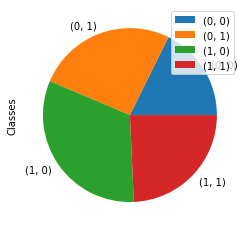

In [34]:
pie_chart.plot(kind='pie', y= 'Classes')

In [35]:
pie_chart

Classes
Classes Region         
0       0            43
        1            63
1       0            78
        1            59

In [36]:
data.drop('year', inplace=True, axis=1)

In [37]:
categorical_features = [feature for feature in data.columns if data[feature].nunique()<3]
categorical_features = data[categorical_features]

In [38]:
data.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes', 'date', 'Region'],
      dtype='object')

In [39]:
discrete_features = ['day', 'month', 'Temperature', 'Ws', 'Region']
discrete_features

['day', 'month', 'Temperature', 'Ws', 'Region']

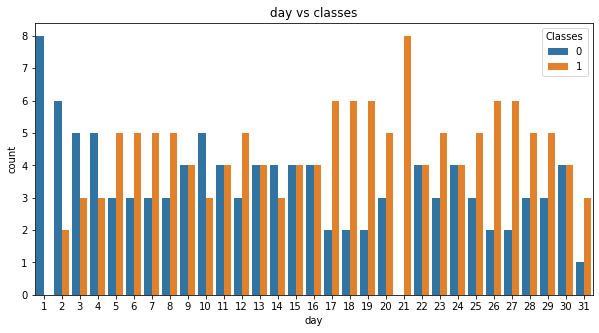

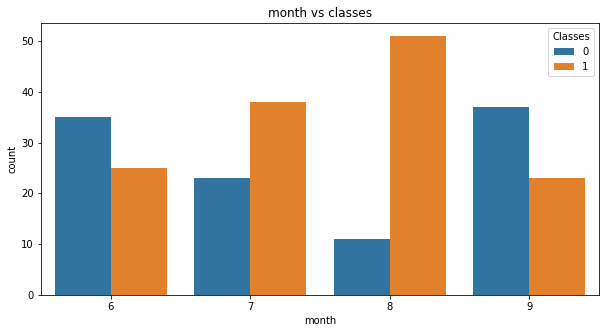

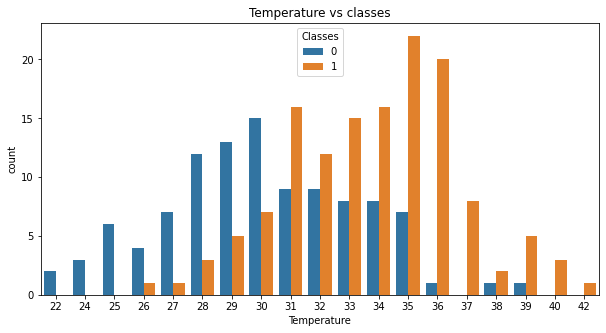

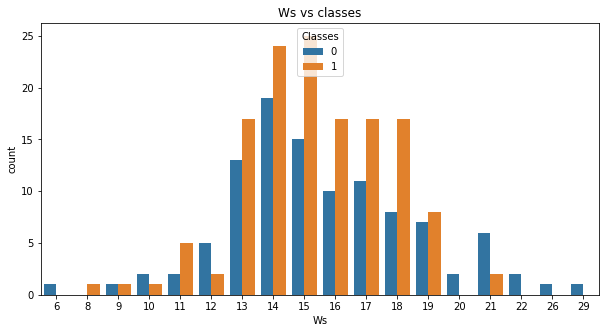

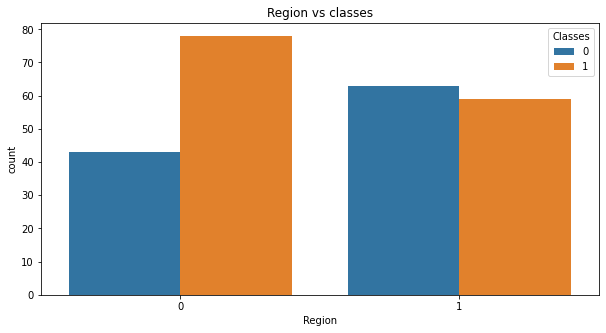

In [40]:
for feature in discrete_features:
    plt.figure(figsize=(10,5))
    sns.countplot(data=data, x=feature, hue='Classes')
    plt.title('{} vs classes'.format(feature))
    plt.show()

# observation

1. In the day vs classes plot except 1st day of the month, eveyday there was more cases of fire.
2. on 21st day there was more cases of fire.
3. day 2,3, 4 and 10 has less cases of fire than the other days.
4. in the month vs classes plot, it is clearly visible that july and august are prone to fire
than the other two months.
5. june and september months there was less fire cases.
6. in the temperature vs classes plot, it is visible that if the temperature goes over 30 degress
there are more chances of fire.
7. if the wind blows between the speed of 13 to 19, there is a definite chances of fire.
8. the region 'Sidi-Bel Abbes' has more cases of fire.


In [41]:
numerical_features = [feature for feature in data.columns if feature not in discrete_features]

In [42]:
numerical_features = [feature for feature in numerical_features if feature not in ['date', 'Classes']]

In [43]:
from scipy.stats import probplot

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


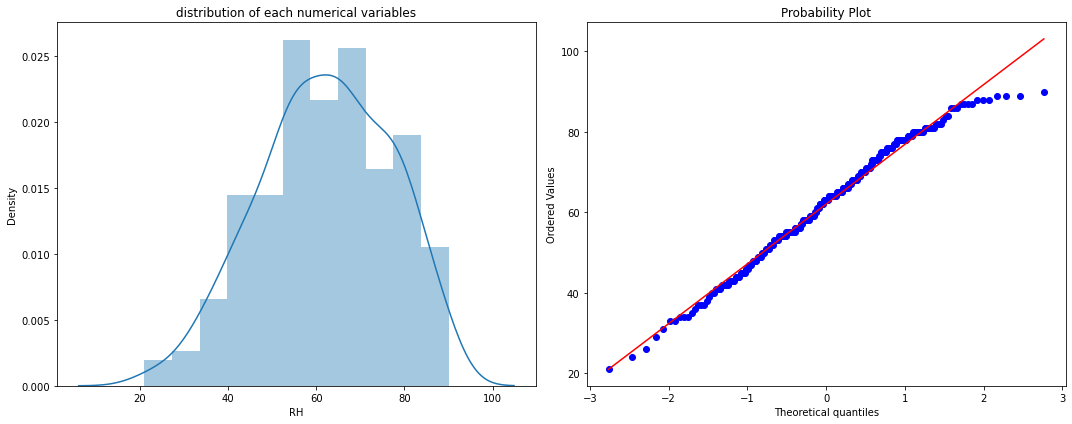

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


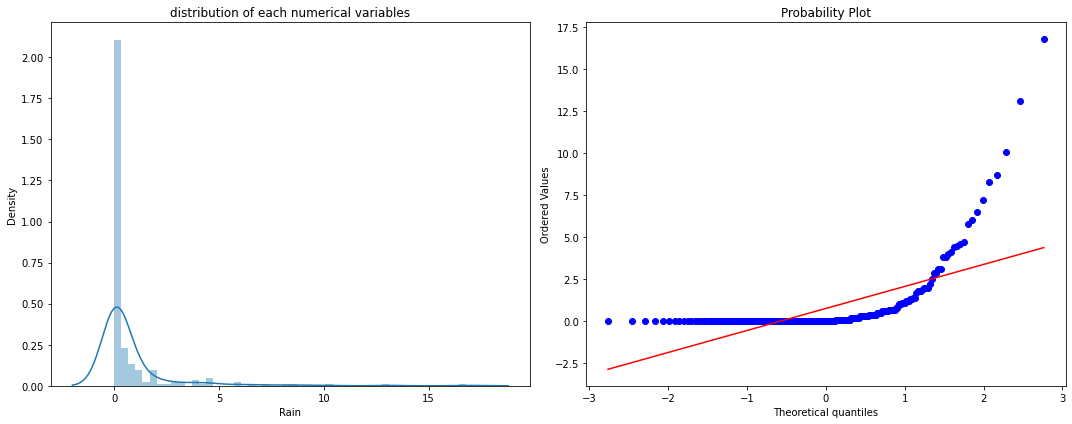

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


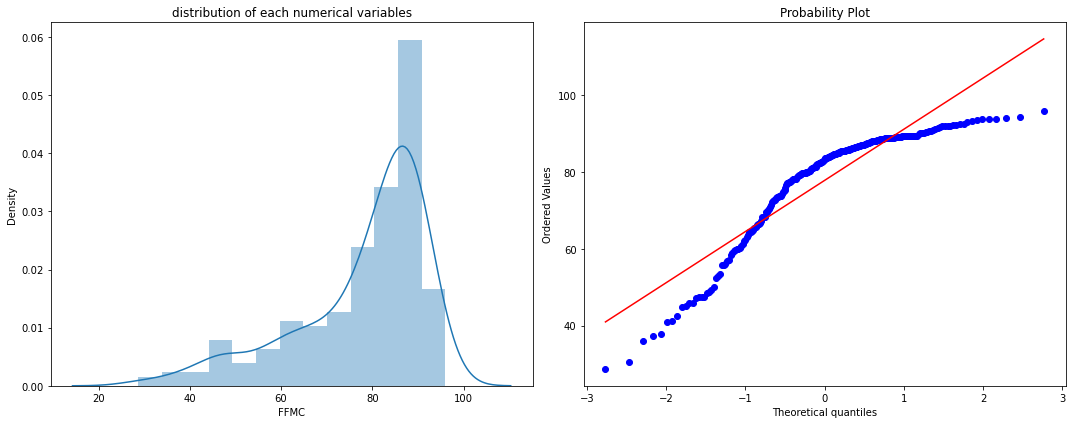

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


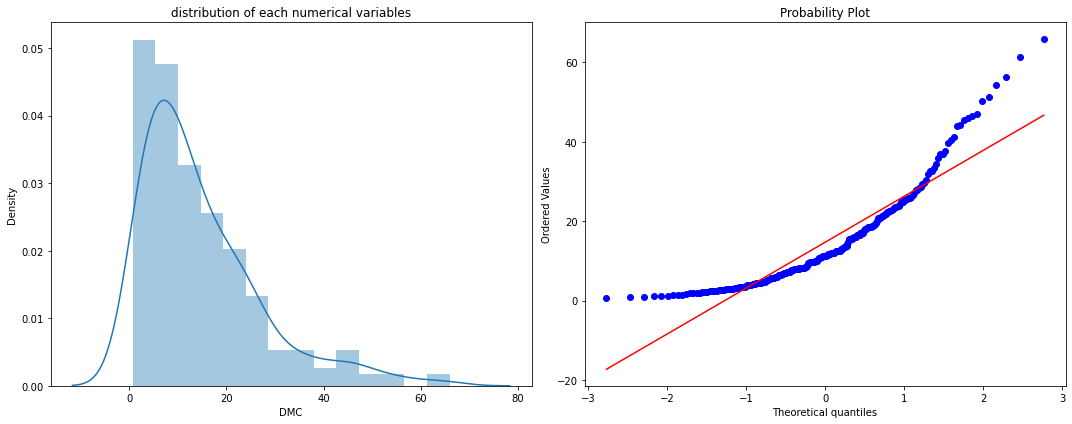

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


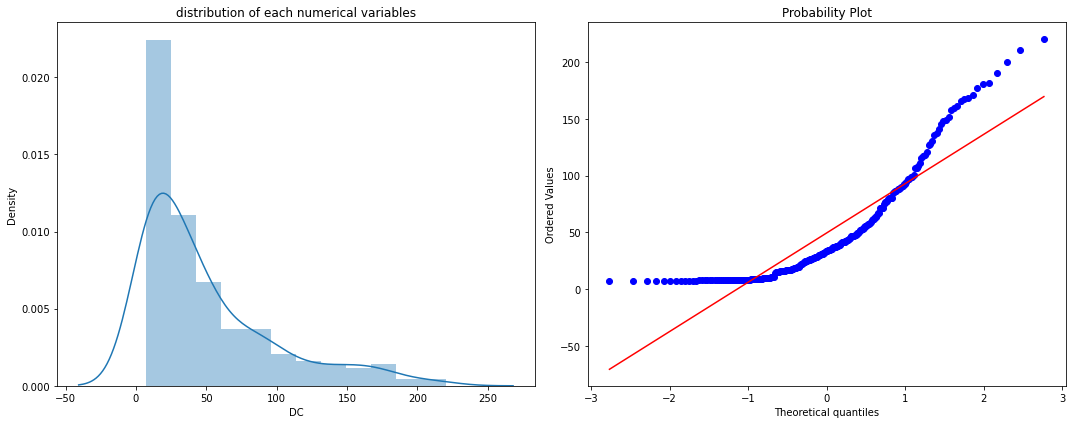

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


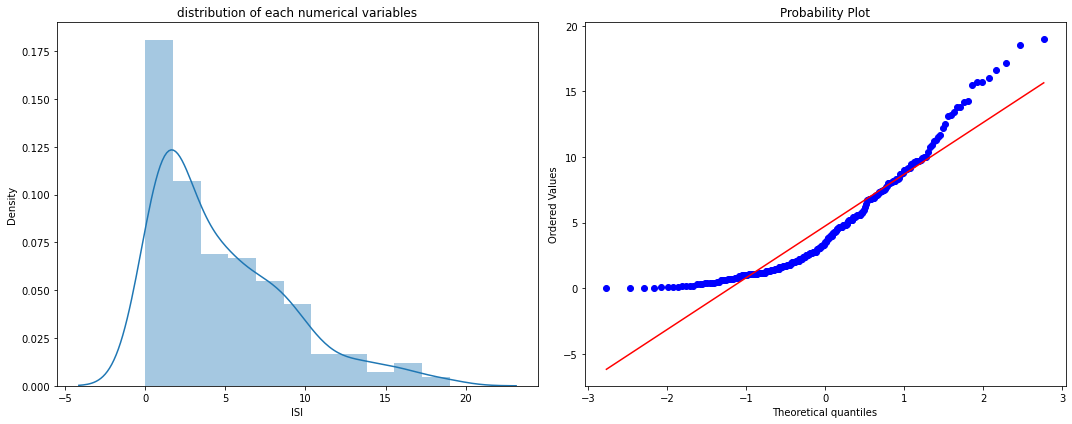

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


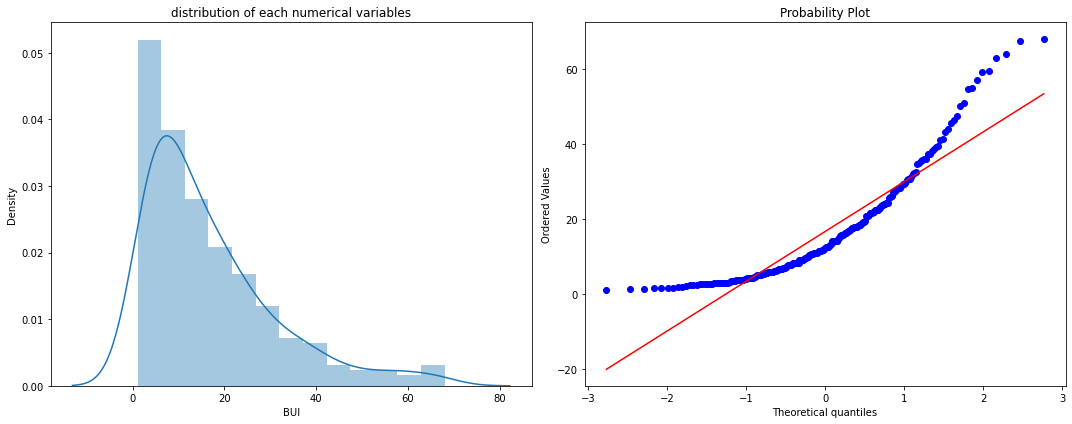

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


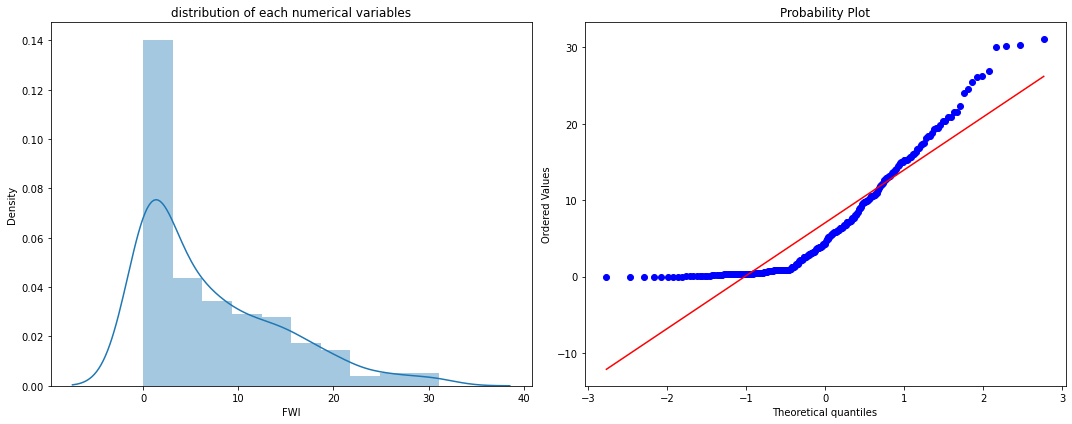

In [44]:
for feature in numerical_features:
    plt.figure(figsize=(15,6)),
    plt.subplot(1,2,1)
    plt.title('distribution of each numerical variables')
    sns.distplot(data[feature])
    plt.tight_layout()
    
    plt.subplot(1,2,2)
    plt.title('Q-Q plot of the feature')
    probplot(x=data[feature], fit=True, plot=plt)
    plt.tight_layout()
    plt.show()
    

# observation

1. 'RH' is following a gaussian distribution.
2. features 'Rain', 'DMC', 'DC', 'BUI', 'FWI', 'ISI' are rightly skewed (log-normal distribution)
3. 'FMCC' is leftly skewed

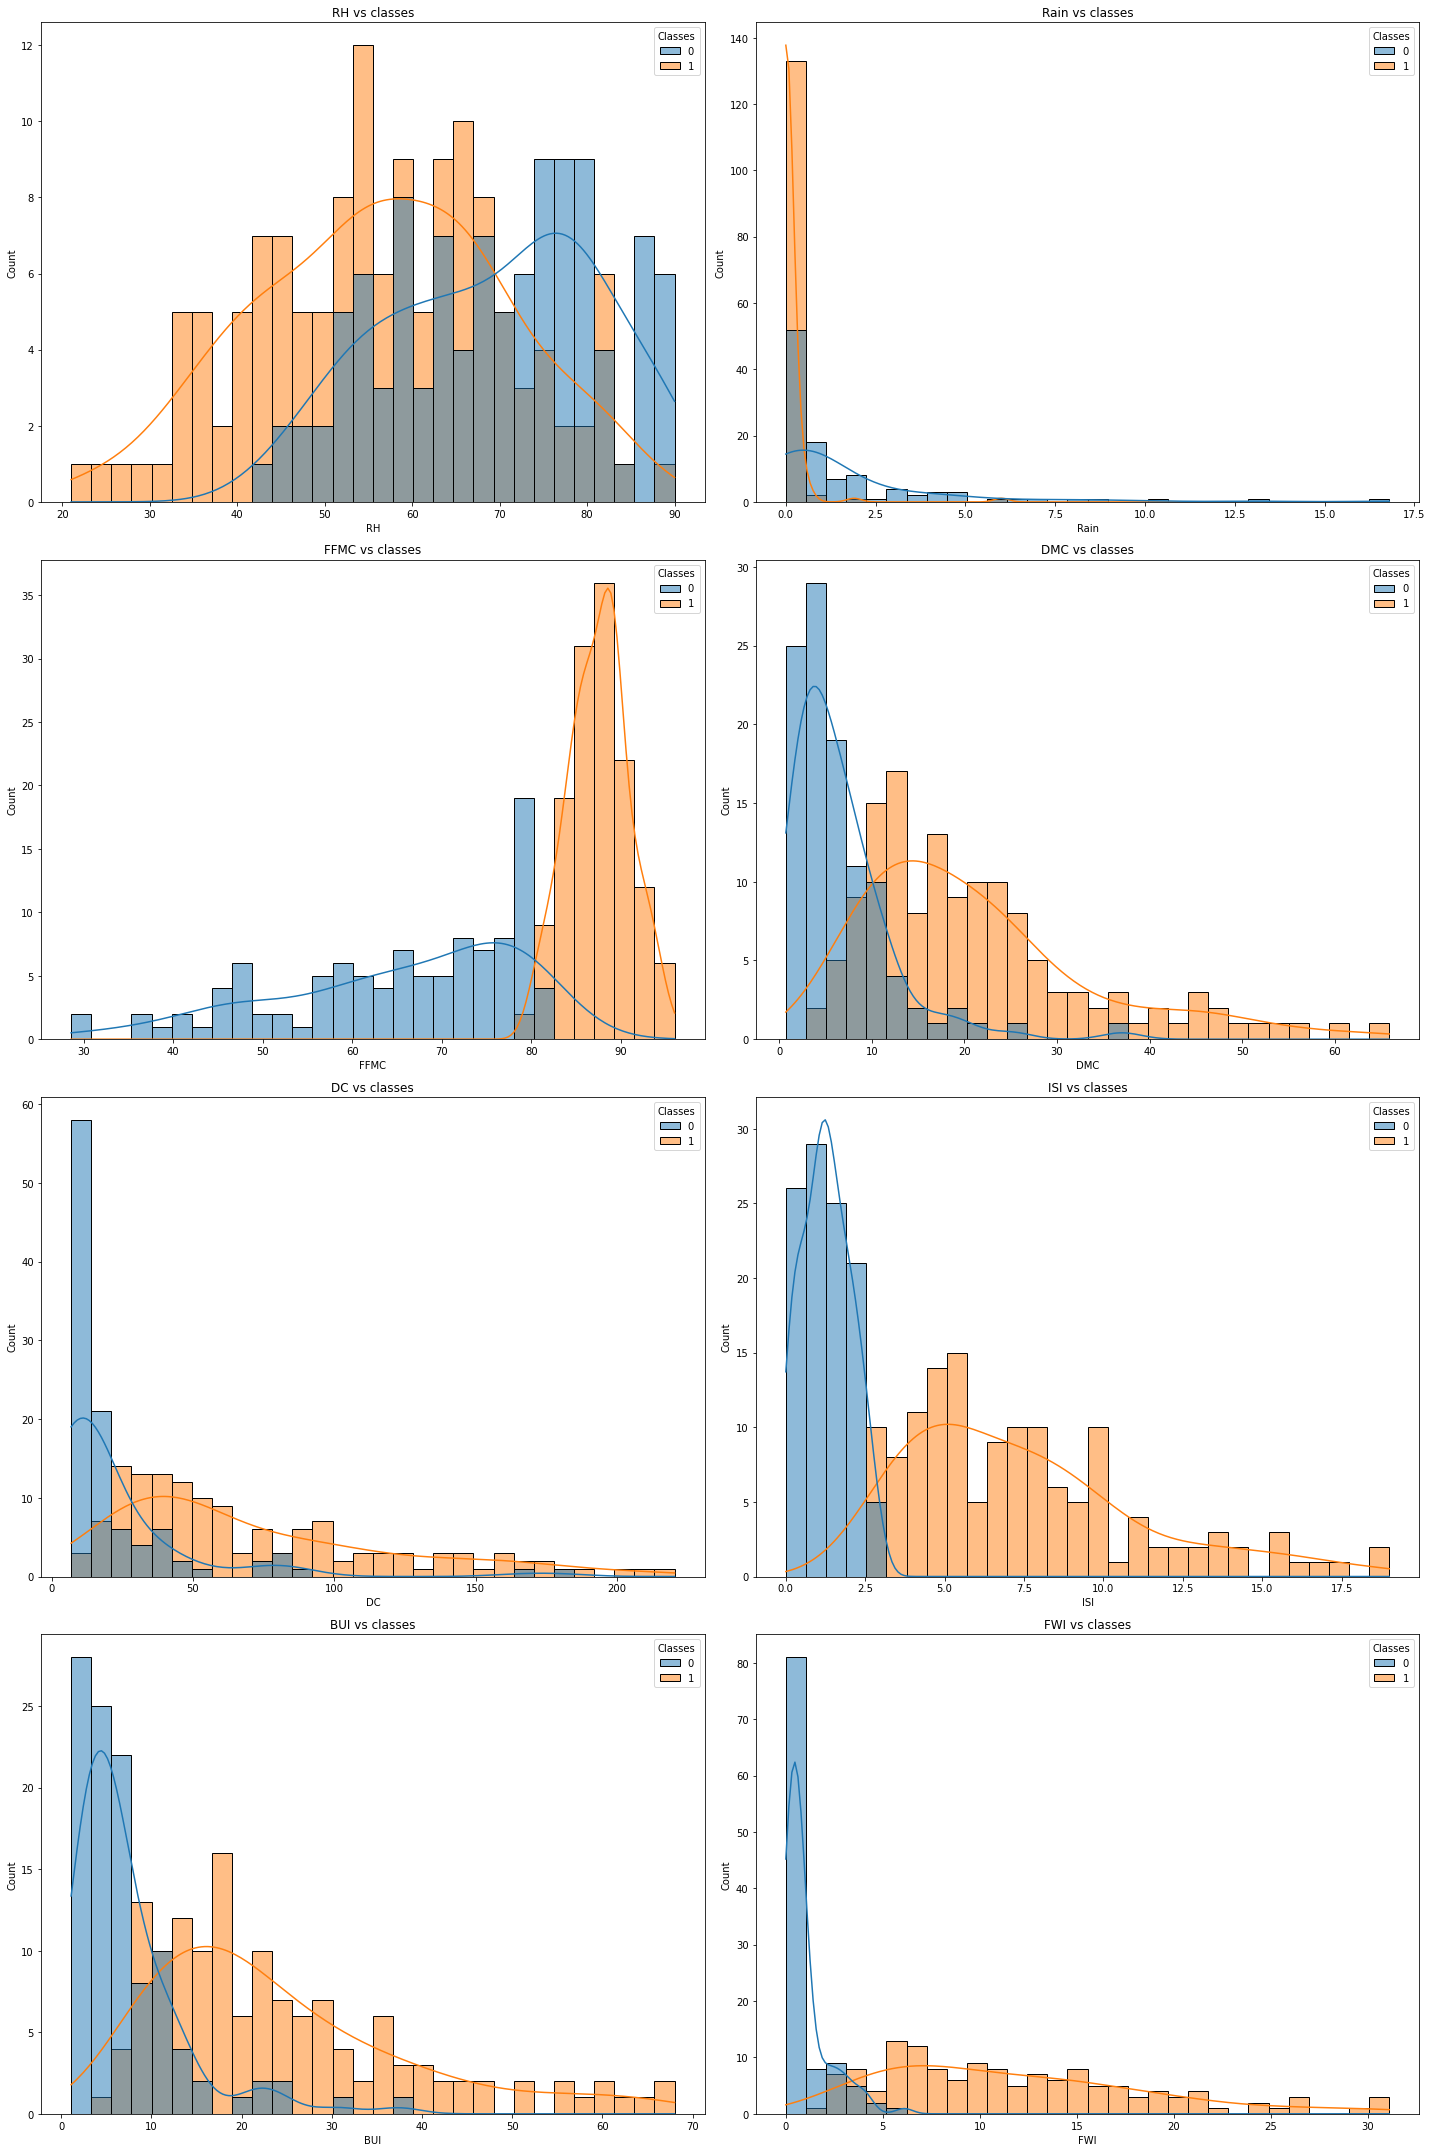

In [45]:
plt.figure(figsize=(20,30))

for i in range(len(numerical_features)):
    plt.subplot(4,2,i+1)
    sns.histplot(x= data[numerical_features[i]], kde=True,hue=data['Classes'], bins=30)
    plt.title('{} vs classes'.format(numerical_features[i]))
    plt.tight_layout()

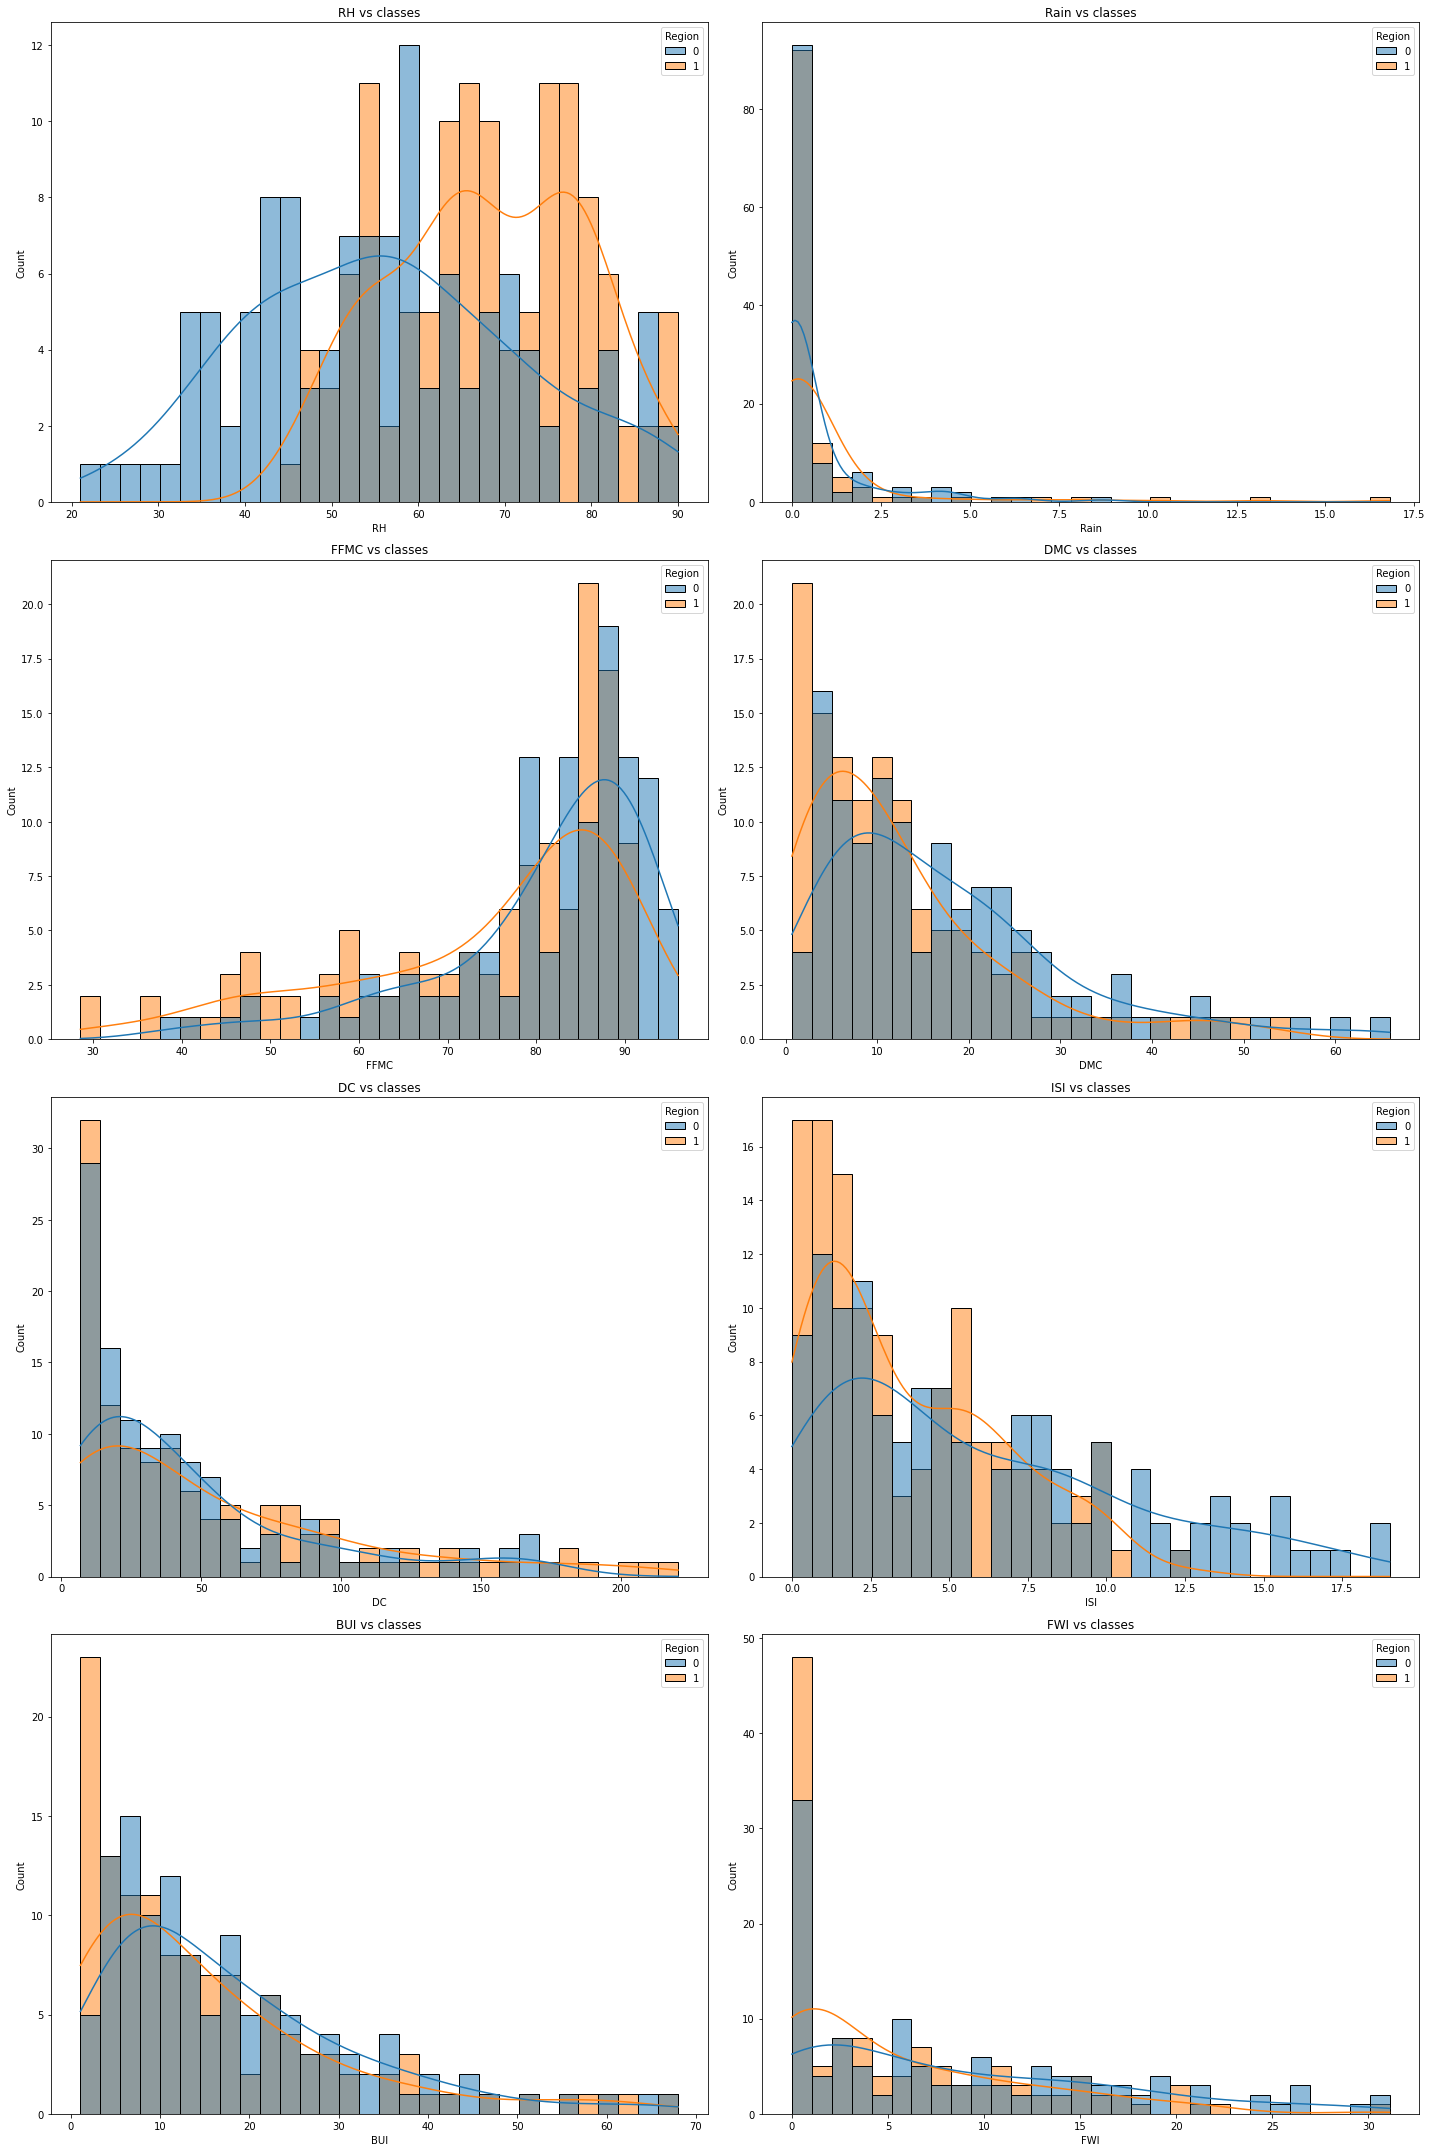

In [46]:
plt.figure(figsize=(20,30))

for i in range(len(numerical_features)):
    plt.subplot(4,2,i+1)
    sns.histplot(x= data[numerical_features[i]], kde=True,hue=data['Region'], bins=30)
    plt.title('{} vs classes'.format(numerical_features[i]))
    plt.tight_layout()

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

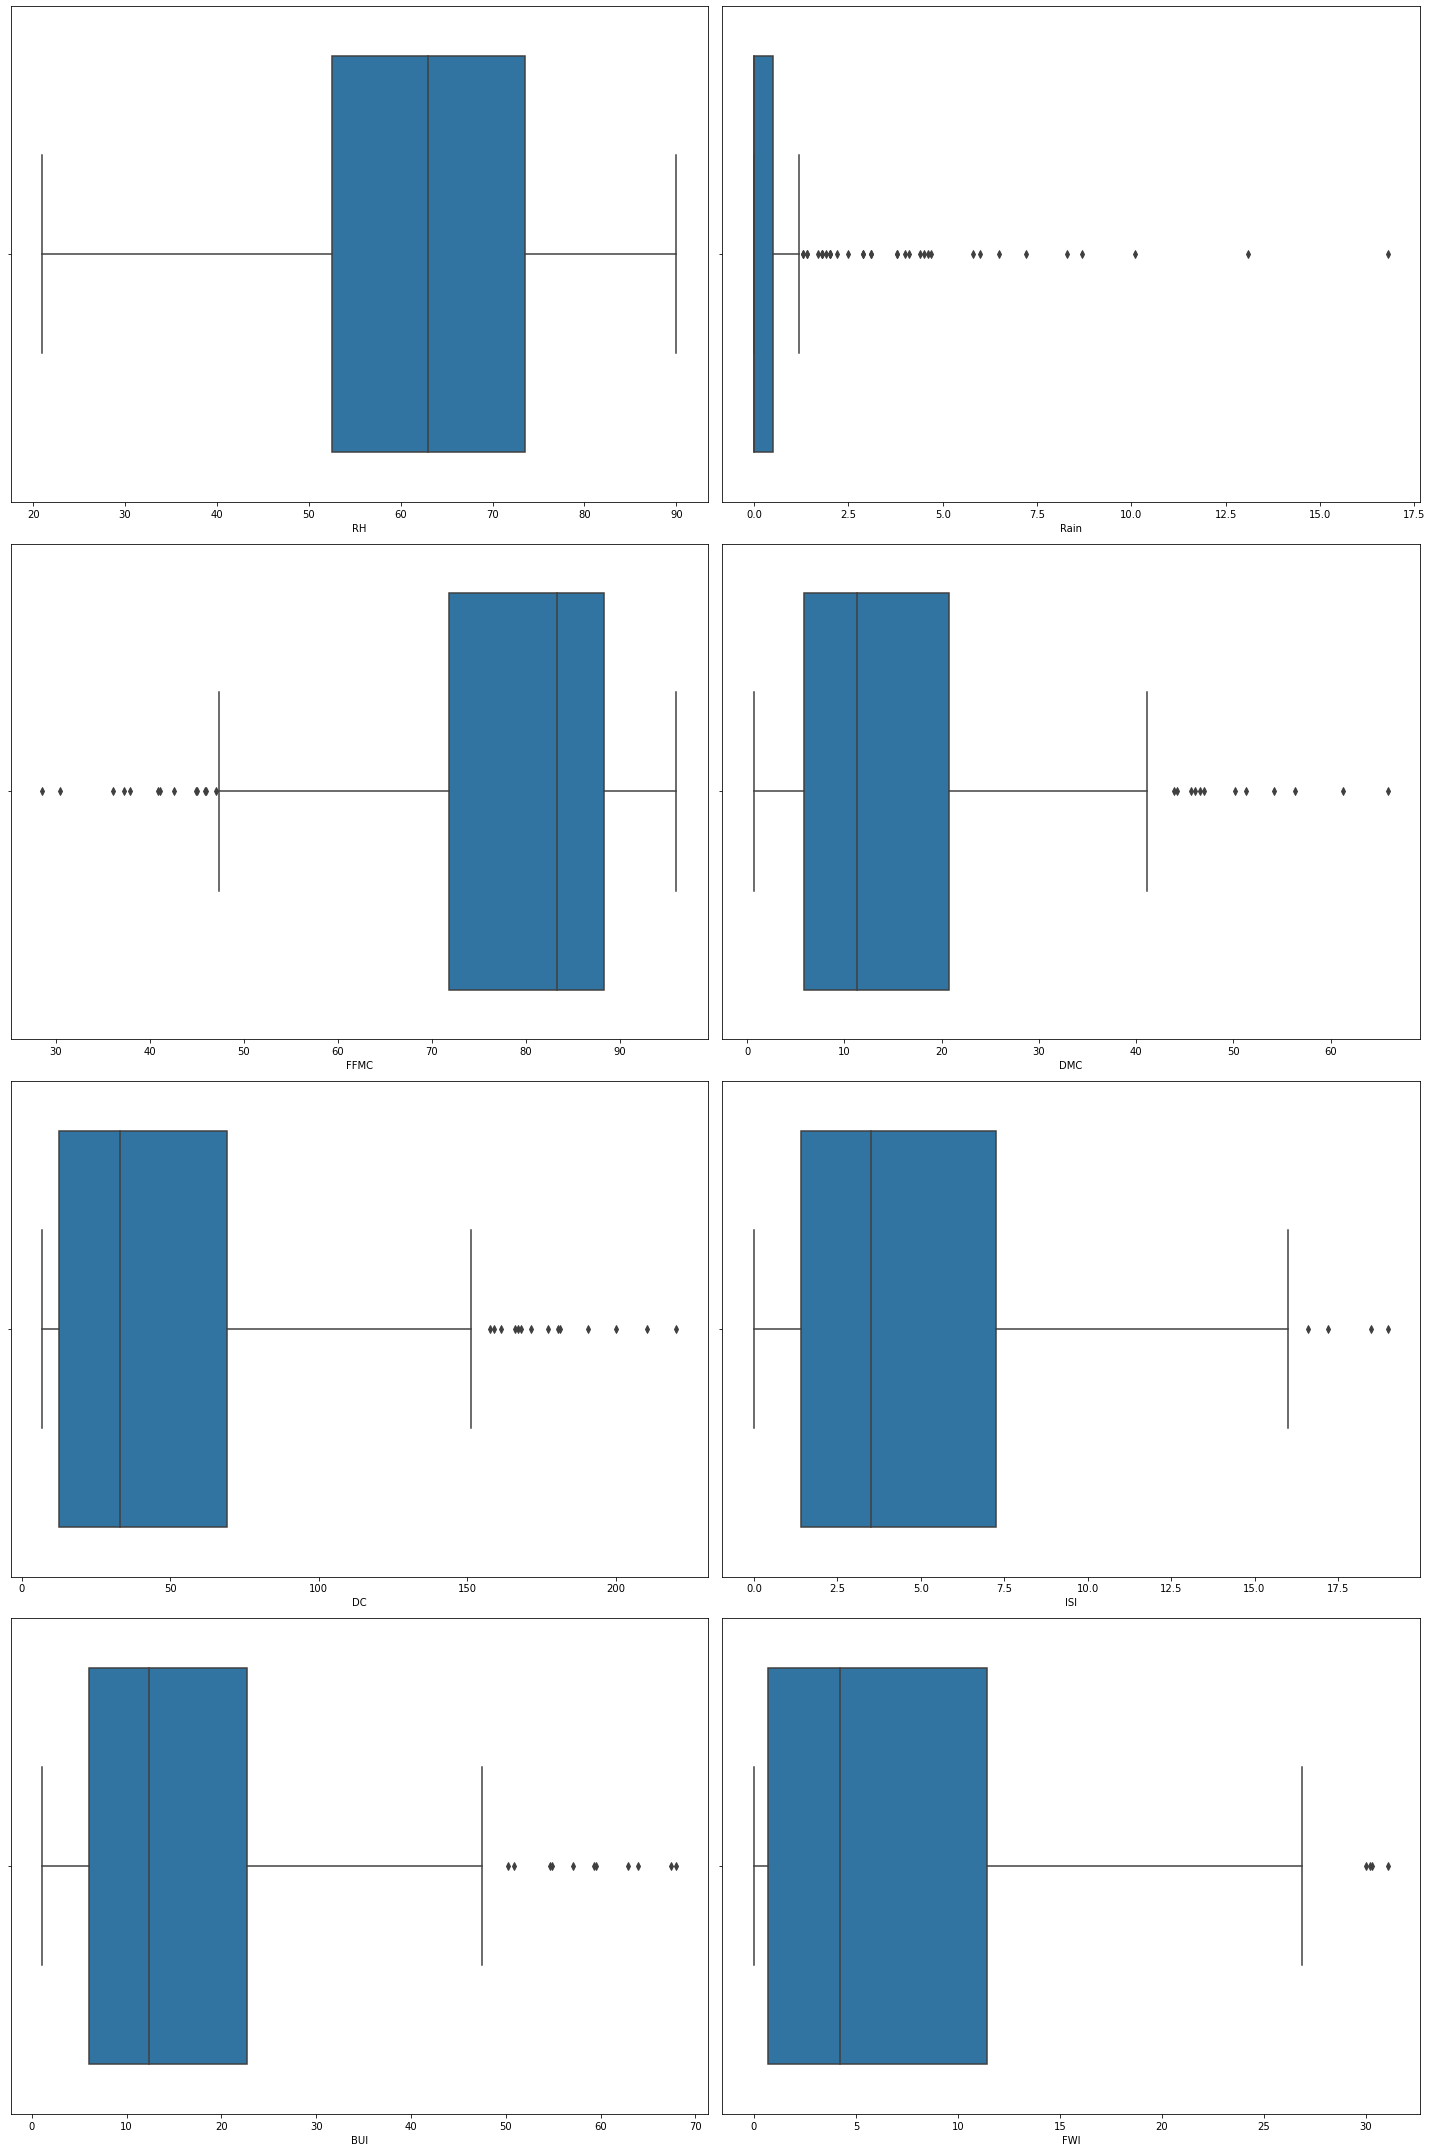

In [47]:
plt.figure(figsize=(20,30))
for i in range(len(numerical_features)):
    plt.subplot(4,2, i+1)
    sns.boxplot(data[numerical_features[i]])
    plt.tight_layout()

# observation 

1. feature 'FMCC' has outliers present in the lower boundary
2. there is no outlier present in the feature RH 
3. features 'Rain', 'DMC', 'DC', 'FWI', 'BUI','ISI' are having outliers present in 
the upper boundary 

In [48]:
round(data[numerical_features+['day', 'month', 'Classes']].corr(), 2)

,RH,Rain,FFMC,DMC,DC,ISI,BUI,FWI,day,month,Classes
RH,1.00,0.22,-0.64,-0.41,-0.23,-0.69,-0.35,-0.58,-0.08,-0.04,-0.43
Rain,0.22,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32,-0.11,0.03,-0.38
FFMC,-0.64,-0.54,1.00,0.60,0.51,0.74,0.59,0.69,0.22,0.02,0.77
DMC,-0.41,-0.29,0.60,1.00,0.88,0.68,0.98,0.88,0.49,0.07,0.59
DC,-0.23,-0.30,0.51,0.88,1.00,0.51,0.94,0.74,0.53,0.13,0.51
ISI,-0.69,-0.35,0.74,0.68,0.51,1.00,0.64,0.92,0.18,0.07,0.74
BUI,-0.35,-0.30,0.59,0.98,0.94,0.64,1.00,0.86,0.52,0.09,0.59
FWI,-0.58,-0.32,0.69,0.88,0.74,0.92,0.86,1.00,0.35,0.08,0.72
day,-0.08,-0.11,0.22,0.49,0.53,0.18,0.52,0.35,1.00,-0.00,0.20
month,-0.04,0.03,0.02,0.07,0.13,0.07,0.09,0.08,-0.00,1.00,0.02


<AxesSubplot:>

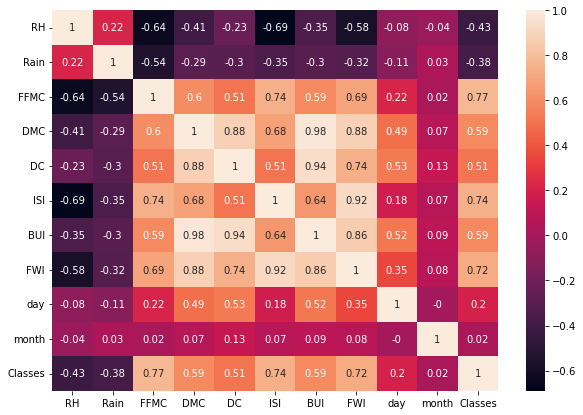

In [49]:
plt.figure(figsize=(10,7))
sns.heatmap(round(data[numerical_features+['day', 'month', 'Classes']].corr(), 2), annot=True)

# positive and negative corelations

1. if the corelation is between 0.90 to 1.0 is very highly corelated 
2. if its between 0.70 and 0.90 then highly corelated
3. corelation between 0.6 and 0.70 is moderately corelated
4. 0.3 to 0.5 is termed as low corelation
5. 0.3 or less is little corelation

# observation 

1. feature with high corealtion 
FWI-DMC, FWI-BUI, FWI-CLASSES,FWI-ISI, DC-DMC, DMC-BUI 

In [50]:
numerical_features

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

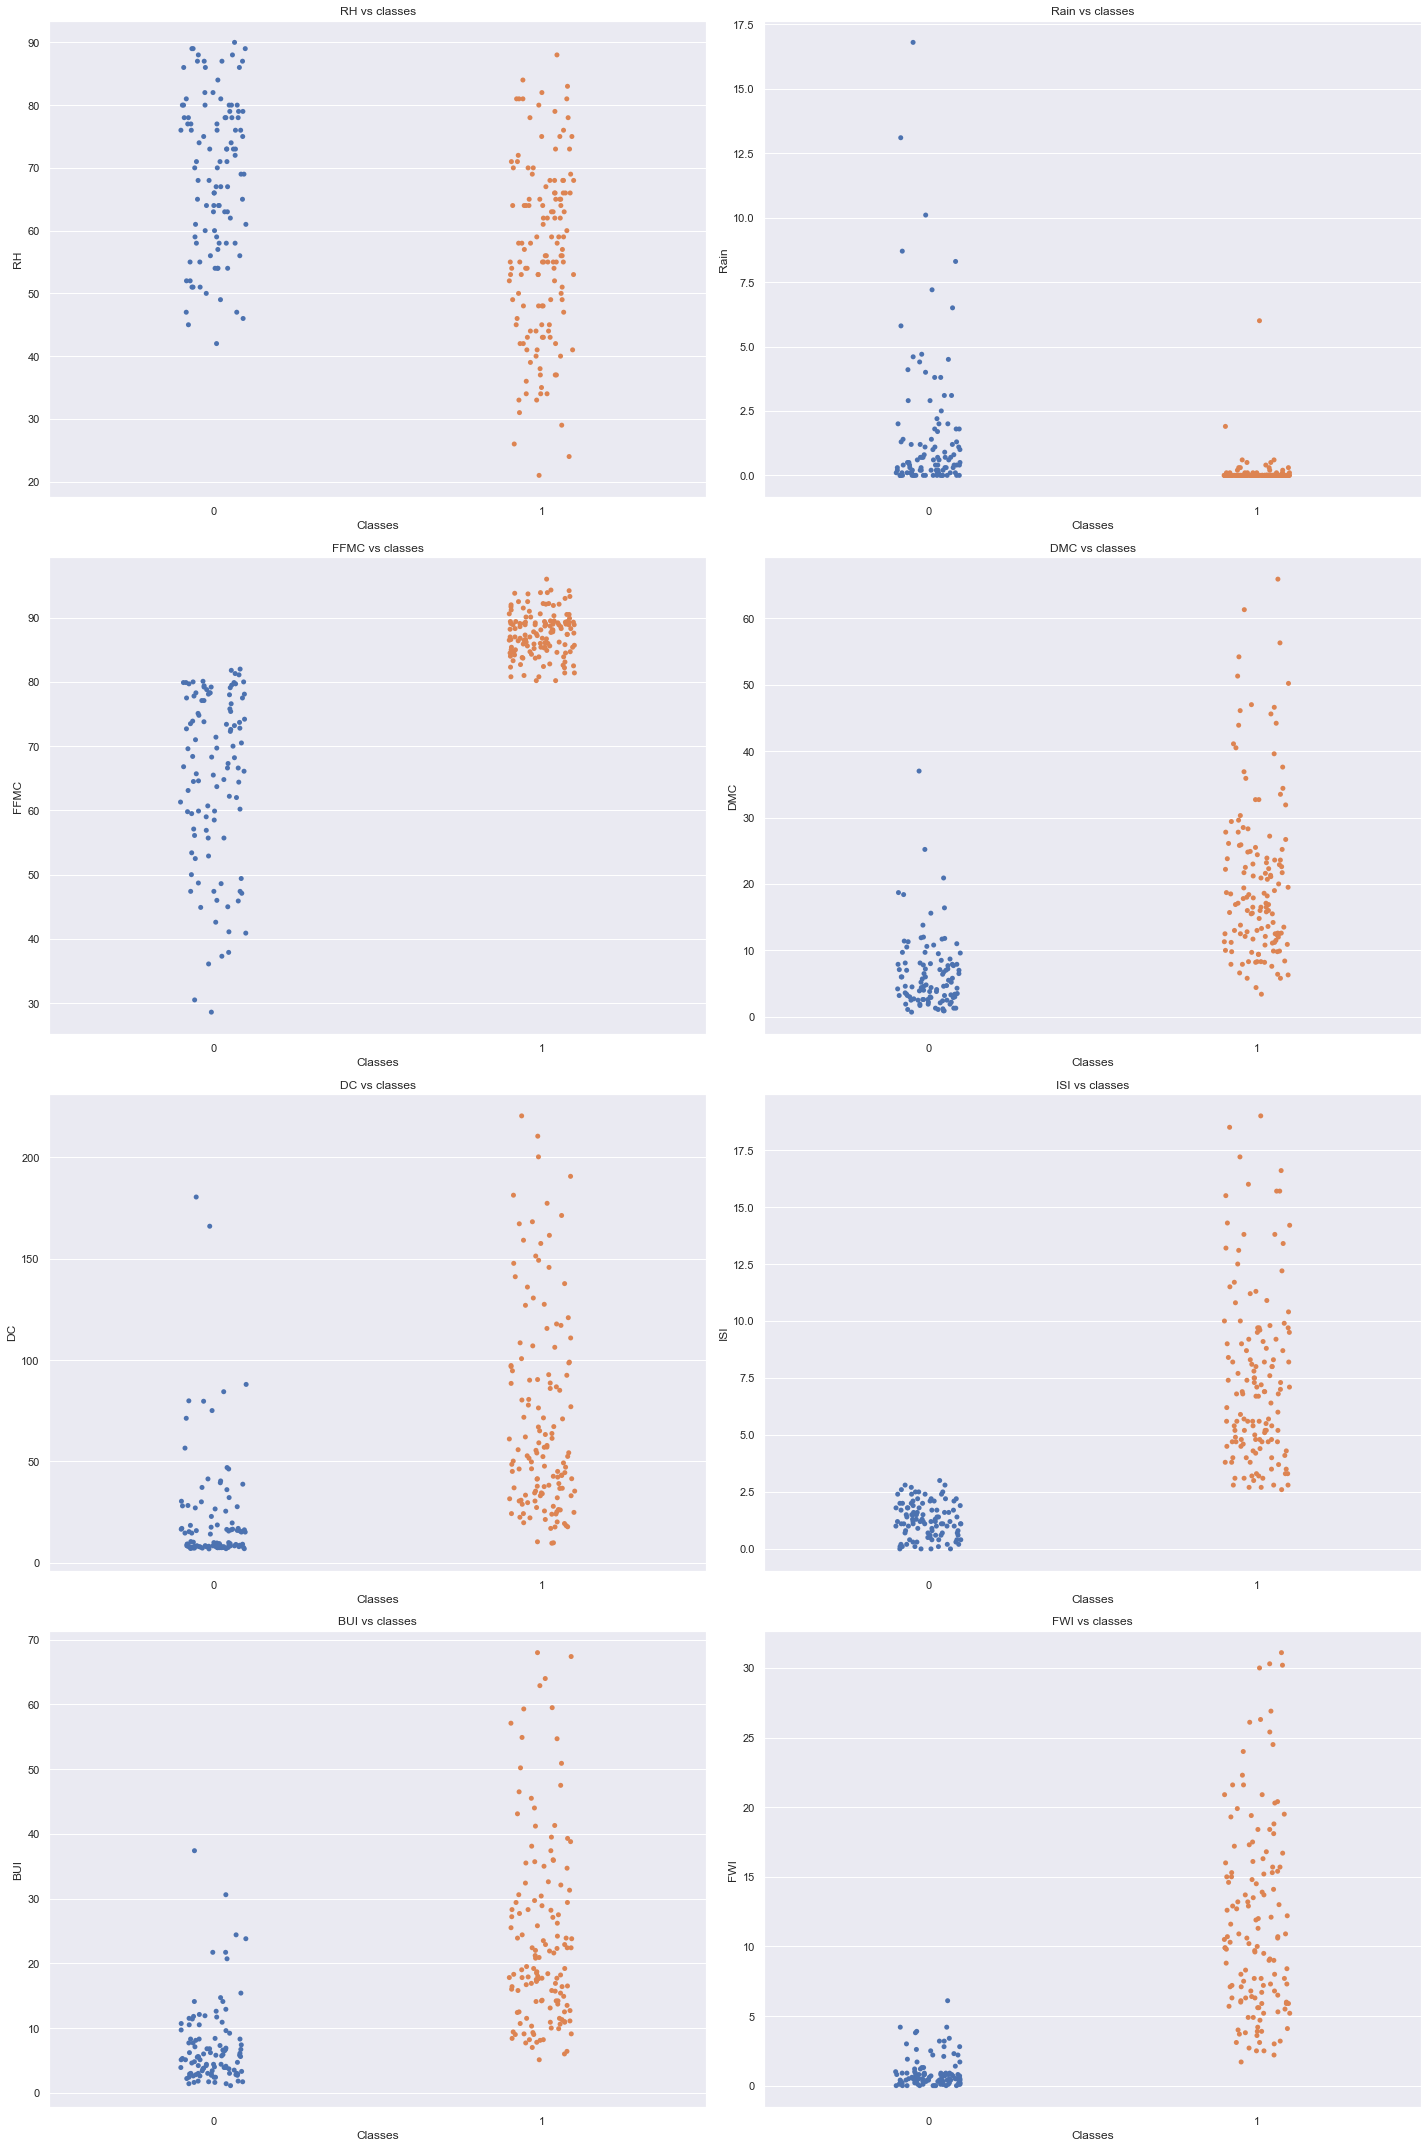

In [51]:
plt.figure(figsize=(20,30))
for i in range(len(numerical_features)):
    sns.set_theme()
    plt.subplot(4,2,i+1)
    sns.stripplot(y=data[numerical_features[i]], x=data['Classes'])
    plt.title('{} vs classes'.format(numerical_features[i]))
    plt.tight_layout()
    
    

In [52]:
data.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes', 'date', 'Region'],
      dtype='object')

In [53]:
x = data.drop(columns=['day', 'month', 'Classes', 'Region', 'date'])

In [54]:
y = data.Classes

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Classes', ylabel='count'>

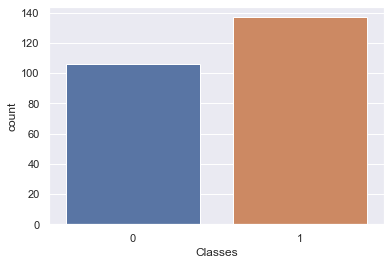

In [57]:
sns.countplot(data.Classes)

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
star = StandardScaler()

In [60]:
def scalar_transformation(data):
    for feature in data.columns:
        data[feature] = star.fit_transform(data[feature].array.reshape(-1,1))

In [61]:
scalar_transformation(x_train)

In [62]:
scalar_transformation(x_test)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logi = LogisticRegression()

In [65]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
24,-0.340494,0.147247,-0.171748,-0.379436,0.614448,-0.005384,0.375217,0.244874,0.165065,0.222334
199,1.264102,-1.638128,-0.518821,-0.379436,1.126077,1.883245,0.886663,2.749000,1.483119,2.752071
21,-0.340494,0.345623,0.522399,-0.331822,0.102819,-0.632025,-0.165137,-0.557419,-0.478983,-0.639756
139,0.194371,0.014997,-1.907114,3.762942,-0.812729,-0.840906,-0.858924,-0.922098,-0.875897,-0.908275
135,-1.410224,1.139123,0.175326,-0.046141,-1.627296,-0.684245,-0.881161,-1.019346,-0.748585,-0.922408
121,-1.945090,1.072998,-0.518821,0.287154,-2.192781,-1.075896,-0.876713,-1.092281,-1.025676,-0.950673
50,0.194371,0.543998,0.522399,-0.379436,0.526932,0.368861,0.546440,0.123314,0.472112,0.278864
57,0.194371,0.940748,-0.171748,-0.379436,0.600984,0.882359,1.576003,0.220562,1.198539,0.632179
59,-0.340494,1.139123,-0.171748,-0.379436,0.526932,1.239196,1.980712,0.001754,1.595453,0.547384
166,-0.340494,1.403623,0.522399,-0.379436,0.466345,0.447191,-0.307452,0.001754,0.232466,0.066875


In [66]:
x_test

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
51,-1.200534,1.188168,1.010712,-0.346142,-0.462557,0.004016,0.369685,-0.735742,0.156735,-0.587007
221,-0.546910,1.262906,-0.197212,-0.411629,0.351715,-0.553538,-0.446919,-0.337255,-0.533935,-0.482624
41,-0.220098,0.889220,-1.002495,-0.346142,-0.319850,-0.553538,-0.569230,-0.806063,-0.581160,-0.807371
225,-0.873722,-1.053947,1.413354,-0.411629,0.813416,-0.317398,-0.466704,0.975408,-0.392259,0.282852
67,0.106714,0.440797,0.205429,-0.411629,0.637130,-0.055019,-0.193304,0.131553,-0.108907,0.016095
92,-2.180970,0.963957,0.608071,4.303390,-2.762667,-0.986463,-0.932565,-1.110788,-1.017993,-0.900156
90,1.087150,0.515534,0.608071,0.112262,-0.521319,0.581249,2.177367,-0.759182,1.083531,-0.424633
129,-1.200534,-0.904472,0.608071,0.439694,-0.630449,-0.566657,-0.934363,-0.806063,-0.693320,-0.818970
206,0.760338,-1.726581,1.010712,-0.411629,1.107226,2.621242,1.765467,2.194309,2.388128,2.695262
40,0.433526,0.963957,-0.599854,-0.411629,0.183824,-0.540419,-0.731112,-0.548219,-0.646095,-0.656596


In [67]:
logi.fit(x_train, y_train)

LogisticRegression()

In [68]:
logi.coef_

array([[ 0.23880557,  0.25578824, -0.11042117,  0.23032559,  2.32944431,
        -0.24898734, -0.02780548,  2.52364633,  0.36182783,  1.99185363]])

In [69]:
logi.intercept_

array([1.52440503])

In [70]:
y_pred = logi.predict(x_test)

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(y_test, y_pred)

0.9387755102040817

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
confusion_matrix(y_test, y_pred)

array([[21,  0],
       [ 3, 25]], dtype=int64)

In [75]:
from sklearn.metrics import precision_score

In [76]:
precision_score(y_test, y_pred)

1.0

In [77]:
from sklearn.metrics import f1_score

In [78]:
f1_score(y_test, y_pred)

0.9433962264150945

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       1.00      0.89      0.94        28

    accuracy                           0.94        49
   macro avg       0.94      0.95      0.94        49
weighted avg       0.95      0.94      0.94        49



# Testing logistic regression model with imbalance datasets

In [81]:
data

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,2012-06-01,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,2012-06-02,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,2012-06-03,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,2012-06-04,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,2012-06-05,1
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,2012-06-06,1
6,7,6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,2012-06-07,1
7,8,6,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,2012-06-08,1
8,9,6,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,2012-06-09,1
9,10,6,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,2012-06-10,1


In [82]:
x_trainimb, x_testimb, y_trainimb, y_testimb = train_test_split(x, y, test_size=0.25, random_state=15)

In [83]:
x_trainimb.shape

(182, 10)

In [84]:
x_testimb.shape

(61, 10)

In [85]:
y_trainimb.shape

(182,)

In [86]:
y_testimb.shape

(61,)

In [87]:
y_trainimb.replace(0,1, inplace=True)

In [88]:
y_testimb.replace(1,0, inplace=True)

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Classes', ylabel='count'>

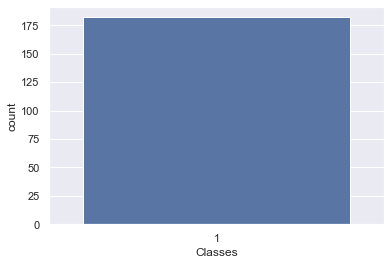

In [89]:
sns.countplot(y_trainimb)

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Classes', ylabel='count'>

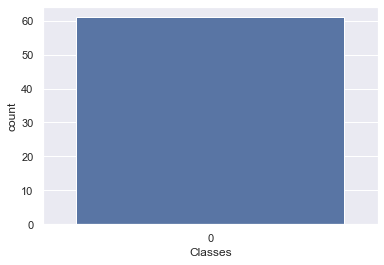

In [90]:
sns.countplot(y_testimb)

In [91]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [92]:
from imblearn.combine import SMOTETomek

In [93]:
smo = SMOTETomek()

In [94]:
train_imb = x_trainimb.join(y_trainimb)

In [95]:
test_imb = x_testimb.join(y_testimb)

In [96]:
train_imb.shape

(182, 11)

In [97]:
test_imb.shape

(61, 11)

In [98]:
train_imb.Classes.value_counts()

1    182
Name: Classes, dtype: int64

In [99]:
test_imb.Classes.value_counts()

0    61
Name: Classes, dtype: int64

In [100]:
data_imb = pd.concat([train_imb, test_imb])

In [101]:
data_imb.shape

(243, 11)

In [102]:
data_imb.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes'],
      dtype='object')

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Classes', ylabel='count'>

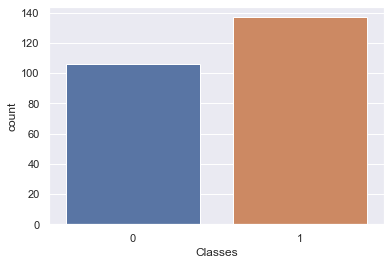

In [103]:
sns.countplot(data.Classes)

In [104]:
data_imb.groupby('Classes').agg('count')

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Classes,,,,,,,,,,
0,61,61,61,61,61,61,61,61,61,61
1,182,182,182,182,182,182,182,182,182,182


In [105]:
x1 = data_imb.drop('Classes', axis=1)

In [106]:
x1.shape

(243, 10)

In [107]:
y1 = data_imb.Classes

In [108]:
y1.shape

(243,)

In [109]:
x1_bal, y1_bal = smo.fit_resample(x1, y1)

In [110]:
x1_bal.shape

(334, 10)

In [111]:
y1_bal.shape

(334,)

In [112]:
datas = pd.concat([x1_bal, y1_bal], axis=1)

In [113]:
x = datas.drop('Classes', axis=1)

In [114]:
y = datas.Classes

In [115]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,36,53,19,0.000000,89.200000,17.100000,98.600000,10.000000,23.900000,15.300000
1,33,54,13,0.000000,88.200000,9.900000,30.500000,6.400000,10.900000,7.200000
2,29,87,15,0.400000,47.400000,4.200000,8.000000,0.200000,4.100000,0.100000
3,32,71,12,0.700000,57.100000,2.500000,8.200000,0.600000,2.800000,0.200000
4,33,76,14,0.000000,81.100000,8.100000,18.700000,2.600000,8.100000,2.200000
...,...,...,...,...,...,...,...,...,...,...
329,30,66,16,0.070227,80.975707,9.679582,40.988657,3.025236,11.843666,3.550472
330,30,71,14,0.000000,79.054832,6.064497,16.481226,2.073606,6.283271,1.147212
331,28,66,17,0.000000,76.401894,3.011322,16.077357,1.962893,4.074214,0.800000
332,30,69,16,0.078078,79.516519,6.846546,37.768157,2.443844,9.415013,2.278078


In [116]:
y

0      1
1      1
2      1
3      1
4      1
      ..
329    0
330    0
331    0
332    0
333    0
Name: Classes, Length: 334, dtype: int64

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
loki = LogisticRegression()

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)

In [120]:
loki.fit(x_train, y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [121]:
loki.intercept_

array([-0.11502256])

In [122]:
loki.coef_

array([[ 0.06397542, -0.00525138, -0.03650542,  0.00825212, -0.02590652,
         0.08666183,  0.03431946,  0.27646305, -0.13015928, -0.1620127 ]])

In [123]:
y_pred = loki.predict(x_test)

In [124]:
accuracy_score(y_test, y_pred)

0.47619047619047616

In [125]:
confusion_matrix(y_test, y_pred)

array([[23, 13],
       [31, 17]], dtype=int64)

In [126]:
f1_score(y_test, y_pred)

0.4358974358974359

In [127]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.64      0.51        36
           1       0.57      0.35      0.44        48

    accuracy                           0.48        84
   macro avg       0.50      0.50      0.47        84
weighted avg       0.51      0.48      0.47        84

